In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# [The StatQuest Introduction to PyTorch](https://www.youtube.com/watch?v=FHdlXe1bSe4&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=22)

## Neural Network class
With PyTorch, creating a Neural Network means creating a **new Class**.

Create a class for our Neural Network, say BasicNN
```python
class BasicNN(nn.Module):
    
    def __init__(self):
        super().__init__() # calls the initialization method of the parent class i.e Module
        pass
    
    def forward(self):
        pass
```

In the above neural network "BasicNN" we have two methods **`init`** and **forward`** :
* **`init method` :** creates and initializes the **weights** and **biases**.
* **`forward method` :** does a **forward pass** through the Neural Network "BasicNN" by taking an input value and calculating the output value with the **weights, biases** & **activation functions.**

input : tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

Finished!!! creating multiple PyTorch Parameter for each Weights & Bias for our NN. 

output : tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])


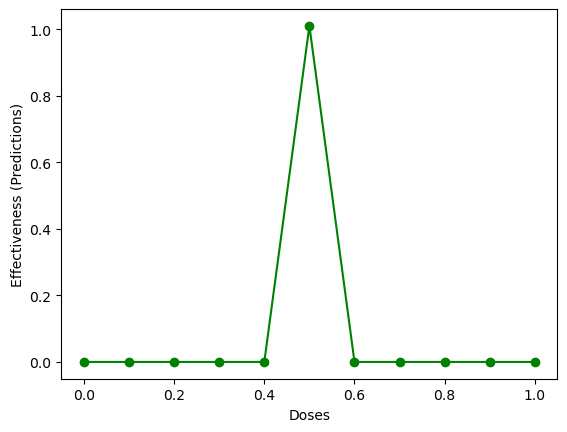

In [2]:
# Import Modules
import torch # to create tensors and store values
import torch.nn as nn # to make the weights & bias tensors part of the Neural Network
import torch.nn.functional as F # gives us the Activation Functions
from torch.optim import SGD # optimizer to fit the Neural Network to the Data

# To draw nice looking graphs
import matplotlib.pyplot as plt

# The Neural Network (BasicNN) inherits from a PyTorch class called Module
class BasicNN(nn.Module):
    def __init__(self): # Initialization method for our new class i.e BasicNN
        super().__init__() # calling the initialization method of the parent class i.e Module
        
        ### initialize the weights & biases in our Neural Network ###
        # the first weight w00
        ### making this weight a Parameter for the Neural Network, gives us the option to optimize it ###
        self.w00 = nn.Parameter(data=torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(data=torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(data=torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(data=torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(data=torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(data=torch.tensor(2.70), requires_grad=False)
        
        self.final_bias = nn.Parameter(data=torch.tensor(-16.0), requires_grad=False)
        
        print("\nFinished!!! creating multiple PyTorch Parameter for each Weights & Bias for our NN. \n")
        
    ### Now we need to connect those PyTorch Parameters with Input, Activation Function & Output
    ### In other words, we need a way to "make Forward Pass" through Neural Network that uses the weights & bias
    ### that we have just initialized
    
    def forward(self, input):
        ### Now the first thing we want to do is connect the Input to the Activation Function
        # (y = input * weight + b)
        input_to_top_relu = input * self.w00 + self.b00 
        # Pass the input_to_top_relu to the Activation Function
        top_relu_output = F.relu(input_to_top_relu)
        # Now scale the top_relu_output by the weight w01
        scaled_top_relu_output = top_relu_output * self.w01
        
        ### Now do the same for the Bottom
        # (y = input * weight + b)
        input_to_bottom_relu = input * self.w10 + self.b10
        # Pass the input_to_bottom_relu to the activation function
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        ### Now add the top and bottom scaled values to the final bias
        input_to_final_relu = (scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias)
        ### Now pass the final dot product "input_to_final_relu" to the Activation Function to get the Final Output
        # Final Output
        output = F.relu(input_to_final_relu)
        
        return output

# Make a quick test of our model
input_doses = torch.linspace(start = 0, end = 1, steps = 11, dtype = torch.float)
print(f"input : {input_doses}")

### Now, the idea is to pass these input_doses through our Neural Network "BasicNN"
model = BasicNN()

# "model" calls the "forward" method by deafault
output = model(input_doses)
print(f"output : {output}")

plt.plot(input_doses, output, color = "g", marker = "o")
plt.xlabel("Doses")
plt.ylabel("Effectiveness (Predictions)")
plt.show()

## Train Neural Network with Backpropagation
Let's optimize the final bias with Backpropagation.

```python
class BasicNN_train(nn.Module):
    
    def __init__(self):
        super().__init__() # calls the initialization method of the parent class i.e Module  
        ...
        # before
        self.final_bias = nn.Parameter(data=torch.tensor(-16.0), requires_grad=False)
        # after
        self.final_bias = nn.Parameter(data=torch.tensor(0.0), requires_grad=True)
    
    def forward(self):
        pass
```

* **`requires_grad=True` :** is what tells PyTorch that this parameter should be optimized.

input : tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

Finished!!! creating multiple PyTorch Parameter for each Weights & Bias for our NN. 

output : tensor([ 0.0000,  3.4020,  6.8040, 10.2060, 13.6080, 17.0100, 13.4760,  9.9420,
         6.4080,  2.8740,  0.0000], grad_fn=<ReluBackward0>)


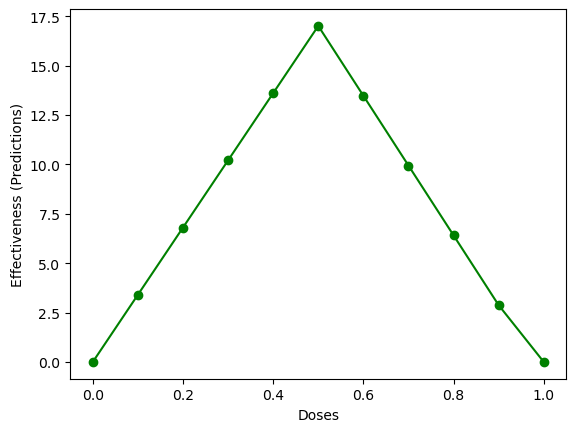

In [3]:
# Import Modules
import torch # to create tensors and store values
import torch.nn as nn # to make the weights & bias tensors part of the Neural Network
import torch.nn.functional as F # gives us the Activation Functions
from torch.optim import SGD # optimizer to fit the Neural Network to the Data

# To draw nice looking graphs
import matplotlib.pyplot as plt

# The Neural Network (BasicNN) inherits from a PyTorch class called Module
class BasicNN_train(nn.Module):
    def __init__(self): # initialization method for our new class i.e BasicNN
        super().__init__() # calls the initialization method of the parent class i.e Module
        
        ### initialize the weights & biases in our Neural Network ###
        # the first weight w00
        ### making this weight a Parameter for the Neural Network, gives us the option to optimize it ###
        self.w00 = nn.Parameter(data=torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(data=torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(data=torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(data=torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(data=torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(data=torch.tensor(2.70), requires_grad=False)
        
        # before
        # self.final_bias = nn.Parameter(data=torch.tensor(-16.0), requires_grad=False)
        # now
        self.final_bias = nn.Parameter(data=torch.tensor(0.0), requires_grad=True)
        
        print("\nFinished!!! creating multiple PyTorch Parameter for each Weights & Bias for our NN. \n")
        
    ### Now we need to connect those PyTorch Parameters with Input, Activation Function & Output
    ### In other words, we need a way to "make Forward Pass" through Neural Network that uses the weights & bias
    ### that we have just initialized
    
    def forward(self, input):
        ### Now the first thing we want to do is connect the Input to the Activation Function
        # (y = input * weight + b)
        input_to_top_relu = input * self.w00 + self.b00 
        # Pass the input_to_top_relu to the Activation Function
        top_relu_output = F.relu(input_to_top_relu)
        # Now scale the top_relu_output by the weight w01
        scaled_top_relu_output = top_relu_output * self.w01
        
        ### Now do the same for the Bottom
        # (y = input * weight + b)
        input_to_bottom_relu = input * self.w10 + self.b10
        # Pass the input_to_bottom_relu to the activation function
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        ### Now add the top and bottom scaled values to the final bias
        input_to_final_relu = (scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias)
        ### Now pass the final dot product "input_to_final_relu" to the Activation Function to get the Final Output
        # Final Output
        output = F.relu(input_to_final_relu)
        
        return output

# Make a quick test of our model
input_doses = torch.linspace(start = 0, end = 1, steps = 11)
print(f"input : {input_doses}")

### Now, the idea is to pass these input_doses through our Neural Network "BasicNN"
model = BasicNN_train()

# "model" calls the "forward" method by deafault
output = model(input_doses)
print(f"output : {output}")

### output.detach() to create a new tensor that only has the values because the "final_bias" now has a gradient
plt.plot(input_doses, output.detach(), color = "g", marker = "o")
plt.xlabel("Doses")
plt.ylabel("Effectiveness (Predictions)")
plt.show()

### Training the Neural Network
**Aim:** our current `final_bias = 0.0`, we want to train the Neural Network "BasicNN_train" and find the optim value for the `final_bias`.
```python
optimizer = SGD(params=model.parameters(), lr = 0.1)
```
* **Note:** The optimizer object **SGD (Stochastic Gradient Descent)**, will optmize every **Parameter** that we set **`requires_grad=True`**.

Final bias, before optimization : 0.0
Epoch : 0, Final Bias : -3.202000141143799
Epoch : 1, Final Bias : -5.7636003494262695
Epoch : 2, Final Bias : -7.812880516052246
Epoch : 3, Final Bias : -9.45230484008789
Epoch : 4, Final Bias : -10.763843536376953
Epoch : 5, Final Bias : -11.813075065612793
Epoch : 6, Final Bias : -12.652460098266602
Epoch : 7, Final Bias : -13.323967933654785
Epoch : 8, Final Bias : -13.861174583435059
Epoch : 9, Final Bias : -14.290939331054688
Epoch : 10, Final Bias : -14.634751319885254
Epoch : 11, Final Bias : -14.909801483154297
Epoch : 12, Final Bias : -15.129840850830078
Epoch : 13, Final Bias : -15.305872917175293
Epoch : 14, Final Bias : -15.446698188781738
Epoch : 15, Final Bias : -15.559358596801758
Epoch : 16, Final Bias : -15.649486541748047
Epoch : 17, Final Bias : -15.721589088439941
Epoch : 18, Final Bias : -15.779271125793457
Epoch : 19, Final Bias : -15.825416564941406
Epoch : 20, Final Bias : -15.862333297729492
Epoch : 21, Final Bias : -15.89

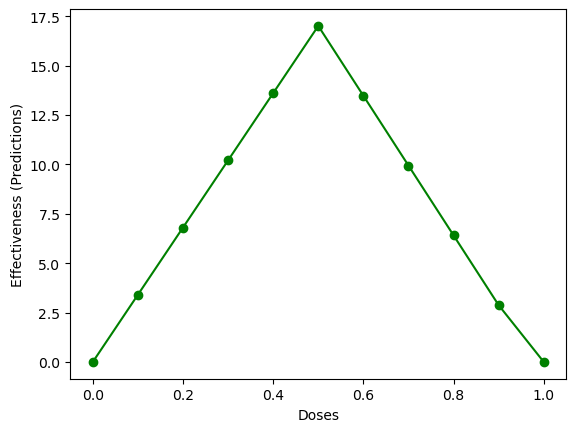

In [4]:
# Training Data
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

# The first thing we do is create an optimizer object, that will use SGD to optimize the "final_bias".
optimizer = SGD(params=model.parameters(), lr = 0.1)
print(f"Final bias, before optimization : {model.final_bias.data}")

### The Loop that will Do Gradient Descent
for epoch in range(100):
    total_loss = 0
    
    ### Now the Nested For Loop, runs each training data point through the Model and calculates the "total_loss"
    for iteration in range(len(inputs)):
        inputs_i = inputs[iteration]
        labels_i = labels[iteration]
        
        # Prediction
        outputs_i = model(inputs_i)
        loss = (labels_i - outputs_i) ** 2
        
        ### backpropagation (loss.backward)): to calculate the derivative of the loss function wrt the parameters we want to optimize
        ### also it accumulates the derivates each time we go through the nested loop for each training data
        loss.backward()
        
        ### as total_loss does not automatically accumulate, so
        total_loss += float(loss)
        
    if (total_loss < 0.0001):
        print(f"Epoch: {epoch}")
        print("The Model has optimally fitted to the training data!!!")
        break
    
    ### if total_loss is not small, then we take a small step towards a better value for "final_bias" using optimizer.step()
    ### just like loss.backward() has access to the derivatives in the model, similarly, optimizer.step() also has the access and
    ### can use them to step in the correct direction
    optimizer.step()
    
    ### Zero out or empty the derivatives that we are storing in the model
    optimizer.zero_grad()
    
    print(f"Epoch : {epoch}, Final Bias : {model.final_bias.data}")
    
print(f"After Optimization, Final Bias : {model.final_bias.data}, Final Loss : {total_loss}")

### Plot
### output.detach() to create a new tensor that only has the values because the "final_bias" now has a gradient
plt.plot(input_doses, output.detach(), color = "g", marker = "o")
plt.xlabel("Doses")
plt.ylabel("Effectiveness (Predictions)")
plt.show()

# [StatQuest introduction to coding Neural Networks with PyTorch + Lightning](https://youtu.be/khMzi6xPbuM?si=yqO_23MltiPK9Ztb)

In [5]:
# Import Modules
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

# PyTorch Lightning Module
! pip3 install lightning -q
import lightning as L
from torch.utils.data import TensorDataset,DataLoader

# Plotting Module
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

input : tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])
output : tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])


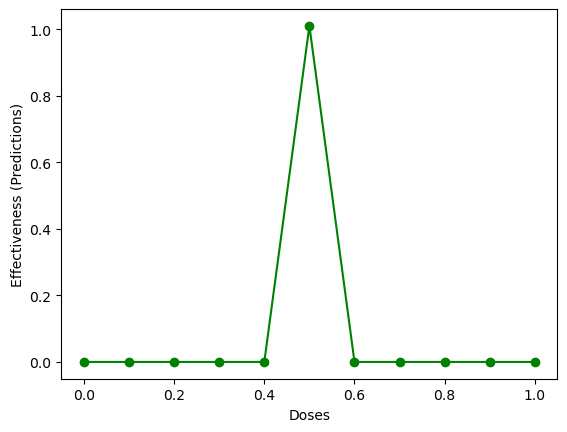

In [6]:
class BasicLightning(L.LightningModule):
    def __init__(self): # Initialization method for our new class i.e "BasicLightning"
        super().__init__() # Calling the initialization method of the parent class i.e LightningModule
        
        ### Set the Parameters (Weights & Biases)
        self.w00 = nn.Parameter(data= torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(data= torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(data= torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(data= torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(data= torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(data= torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(data= torch.tensor(-16.0), requires_grad=False)
    
    ### Now we need to connect those PyTorch Parameters with Input, Activation Function & Output
    ### In other words, we need a way to "make Forward Pass" through Neural Network that uses the weights & bias
    ### that we have just initialized
    
    def forward(self, inputs):
        input_to_top_relu = inputs * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bottom_relu = inputs * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        input_to_final_relu = (scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias)
        
        output = F.relu(input_to_final_relu)
        
        return output

# Make a quick test of our model
input_doses = torch.linspace(start = 0, end = 1, steps = 11)
print(f"input : {input_doses}")

### Now, the idea is to pass these input_doses through our Neural Network "BasicNN"
model = BasicLightning()

# "model" calls the "forward" method by deafault
output = model(input_doses)
print(f"output : {output}")

plt.plot(input_doses, output, color = "g", marker = "o")
plt.xlabel("Doses")
plt.ylabel("Effectiveness (Predictions)")
plt.show()

## Train Neural Network with Backpropagation using PyTorch + Lightning
Let's optimize or find the final bias with Backpropagation and also find the optimal `Learning Rate`.

```python
class BasicLightning_train(L.LightningModule):
    
    def __init__(self):
        super().__init__() # calls the initialization method of the parent class i.e Module  
        ...
        # before
        self.final_bias = nn.Parameter(data=torch.tensor(-16.0), requires_grad=False)
        # after
        self.final_bias = nn.Parameter(data=torch.tensor(0.0), requires_grad=True)
        
        # after
        self.learning_rate = 0.01
    
    def forward(self):
        pass
```

* **`requires_grad=True` :** is what tells PyTorch that this parameter should be optimized.

input : tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])
output : tensor([ 0.0000,  3.4020,  6.8040, 10.2060, 13.6080, 17.0100, 13.4760,  9.9420,
         6.4080,  2.8740,  0.0000], grad_fn=<ReluBackward0>)


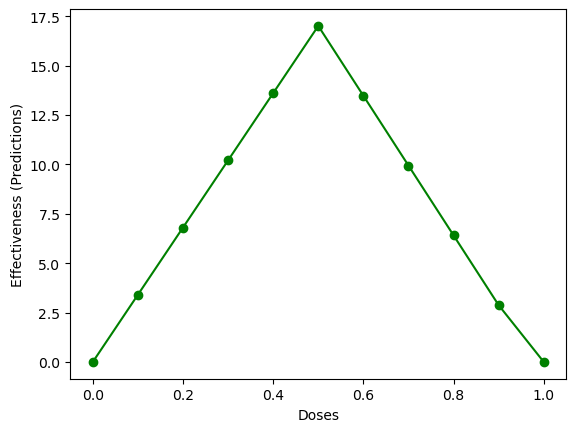

In [7]:
class BasicLightning_train(L.LightningModule):
    def __init__(self): # Initialization method for our new class i.e "BasicLightning"
        super().__init__() # Calling the initialization method of the parent class i.e LightningModule
        
        ### Set the Parameters (Weights & Biases)
        self.w00 = nn.Parameter(data= torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(data= torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(data= torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(data= torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(data= torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(data= torch.tensor(2.7), requires_grad=False)
        
        # before
        # self.final_bias = nn.Parameter(data=torch.tensor(-16.0), requires_grad=False)
        # after
        self.final_bias = nn.Parameter(data=torch.tensor(0.0), requires_grad=True)
        
        # new
        self.learning_rate = 0.01
    
    ### Now we need to connect those PyTorch Parameters with Input, Activation Function & Output
    ### In other words, we need a way to "make Forward Pass" through Neural Network that uses the weights & bias
    ### that we have just initialized
    
    def forward(self, inputs):
        input_to_top_relu = inputs * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bottom_relu = inputs * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        input_to_final_relu = (scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias)
        
        output = F.relu(input_to_final_relu)
        
        return output

# Make a quick test of our model (This is not the Training of Neural Network)
input_doses = torch.linspace(start = 0, end = 1, steps = 11)
print(f"input : {input_doses}")

### Now, the idea is to pass these input_doses through our Neural Network "BasicNN"
model = BasicLightning_train()

# "model" calls the "forward" method by deafault
output = model(input_doses)
print(f"output : {output}")

plt.plot(input_doses, output.detach(), color = "g", marker = "o")
plt.xlabel("Doses")
plt.ylabel("Effectiveness (Predictions)")
plt.show()

### Training the Neural Network
**Aim:** our current `final_bias = 0.0`, we want to train the Neural Network `"BasicLightning_train"` and find the optim value for the `final_bias`.
```python
optimizer = SGD(params=model.parameters(), lr = 0.1)
```
* **Note:** The optimizer object **SGD (Stochastic Gradient Descent)**, will optmize every **Parameter** that we set **`requires_grad=True`**.

**why DataLoader ???** because dataloaders are super useful when we have a lots of data:
* They make it **easy to access** the data in batches.
* They make it **easy to shuffle** the data in each Epoch.
* They make it **easy to use** a relatively small fraction of data if we want to do quick and dirty training for debugging.

In [8]:
### Training Data
inputs = torch.tensor([0.0, 0.5, 1.0])
labels = torch.tensor([0.0, 1.0, 0.0])

dataset = TensorDataset(inputs,labels)
dataloader = DataLoader(dataset)

In [9]:
class BasicLightning_train(L.LightningModule):
    def __init__(self): # Initialization method for our new class i.e "BasicLightning"
        super().__init__() # Calling the initialization method of the parent class i.e LightningModule
        
        ### Set the Parameters (Weights & Biases)
        self.w00 = nn.Parameter(data= torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(data= torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(data= torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(data= torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(data= torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(data= torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(data=torch.tensor(0.0), requires_grad=True)
        
        self.learning_rate = 0.01
    
    ### Now we need to connect those PyTorch Parameters with Input, Activation Function & Output
    ### In other words, we need a way to "make Forward Pass" through Neural Network that uses the weights & bias
    ### that we have just initialized
    
    def forward(self, inputs):
        input_to_top_relu = inputs * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bottom_relu = inputs * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        input_to_final_relu = (scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias)
        
        output = F.relu(input_to_final_relu)
        
        return output
    
    def configure_optimizers(self):
        ### SGD (Stochastic Gradient Descent), will optmize every Parameter that we set requires_grad=True.
        return SGD(params=self.parameters() ,lr=self.learning_rate)
    
    def training_step(self, batch, batch_idx):
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = (label_i - output_i) ** 2
        return loss

### optimizing/training the neural network

**`Lightning Trainer :`** which we will first use to find a good value for the `"Learning Rate"` and then we will use it to **optimize** or **train**, the model.

In [10]:
# create a model object
model = BasicLightning_train()
# create a Lightning Trainer, 
trainer = L.Trainer(max_epochs=34, accelerator="auto", devices="auto")
# create a tuner
tuner = L.pytorch.tuner.Tuner(trainer)

# Find the optimal Learning Rate
find_learning_rate = tuner.lr_find(model,train_dataloaders = dataloader,
                                          min_lr = 0.001,
                                          max_lr = 1.0,
                                          early_stop_threshold = None)

new_learning_rate = find_learning_rate.suggestion()
print(f"\nfind_learning_rate() suggests : {new_learning_rate:5f} for the learning rate.\n")

INFO: GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/opt/conda/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=100` reached.
INFO: Learning rate set to 0.002137962089502232
INFO: Restoring states from the checkpoint path at /kaggle/working/.lr_find_750a0286-9415-47f6-89d0-6ad3aeefeaaf.ckpt
INFO: Restored all states from the checkpoint at /kaggle/working/.lr_find_750a0286-9415-47f6-89d0-6ad3aeefeaaf.ckpt



find_learning_rate() suggests : 0.002138 for the learning rate.



### How the trainer.fit() works???
1. After we call the `trainer.fit()`,
2. The `trainer` will then call our model's `configure_optimizers()` method, which then configures our optimizer **SGD** with the newly found **Learning Rate**.
3. Then the **trainer** calls our model's `training_step()` method, to calculate the loss. The following steps are automatically performed by Lightning, unlike PyTorch:
    * in **Lightning** the **trainer** will call `optimizer.zero_grad()` so that each Epoch starts with fresh **Gradient**, and then
    * the **trainer** will call `loss.backward()` to calculate the **new Gradient**, and then 
    * the **trainer** will call `optimizer.step()` to take a step towards finding the optimal values for the parameters(weights & biases).
4. The model's `training_step()` method gets called, equals to the number of Epochs.

In [11]:
# update the learning rate
model.learning_rate = new_learning_rate

# train the model
trainer.fit(model = model, train_dataloaders=dataloader, val_dataloaders=None)

print(f"\nFinal optimal Bias found : {model.final_bias.data}\n")

INFO: 
  | Name | Type | Params
------------------------------
------------------------------
1         Trainable params
6         Non-trainable params
7         Total params
0.000     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=34` reached.



Final optimal Bias found : -2.170588970184326



output : tensor([ 0.0000,  1.2314,  4.6334,  8.0354, 11.4374, 14.8394, 11.3054,  7.7714,
         4.2374,  0.7034,  0.0000], grad_fn=<ReluBackward0>)


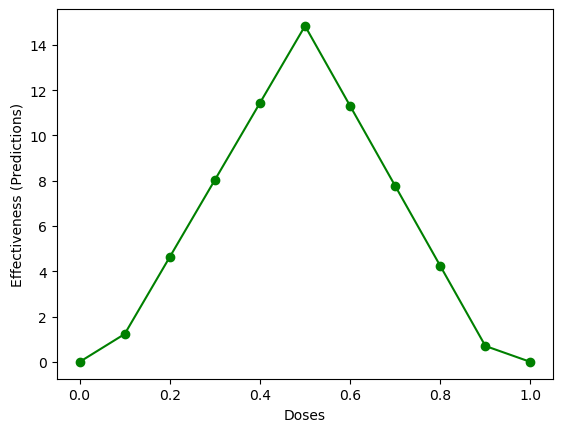

In [12]:
# "model" calls the "forward" method by deafault
output = model(input_doses)
print(f"output : {output}")

plt.plot(input_doses, output.detach(), color = "g", marker = "o")
plt.xlabel("Doses")
plt.ylabel("Effectiveness (Predictions)")
plt.show()